In [78]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import arabic_reshaper
from bidi.algorithm import get_display

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [79]:
#Read in the csv file and convert to a Pandas dataframe
df_ehsan = pd.read_csv("data/ehsan.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [80]:
df_ehsan.shape

(1485, 11)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [81]:
df_ehsan.head()

,Unnamed: 0,Case Number,Project Names,Amount,Date,Beneficiaries,Beneficiary type,Number of donations,Partner,Location,Details URL
0,0,P49631,وجبات الإفطار في ساحات الحرم المكي,"300,000ر.س",07/03/2025,"20,000",المواطنون والمقيمون بالمملكة,"16,226",جمعية البر الخيرية بالأبواء,مكة المكرمة,https://ehsan.sa/projects/0/48632?amount=null
1,1,P49553,وجبات السحور للصائمين,"280,000ر.س",07/03/2025,"20,000",المواطنون والمقيمون بالمملكة,"24,403",جمعية البر الخيرية بالنويعمة,وادى الدواسر,https://ehsan.sa/projects/0/48554?amount=null
2,2,P49625,وجبات الإفطار لضيوف الرحمن,"300,000ر.س",07/03/2025,"30,000",المواطنون والمقيمون بالمملكة,"11,930",جمعية البر الخيرية بالحوية,السيل الكبير,https://ehsan.sa/projects/0/48626?amount=null
3,3,P49618,ترميم مساكن المتعففين,"300,000ر.س",07/03/2025,11,المواطنون,"9,378",الجمعية الخيرية ببللحمر,باللحمر,https://ehsan.sa/projects/0/48619?amount=null
4,4,P49626,عملية في العمود الفقري لمريضة متعففة,"24,000ر.س",07/03/2025,1,المقيمون بالمملكة,145,جمعية رحماء الصحية,الرياض,https://ehsan.sa/projects/0/48627?amount=null


In [82]:
df_ehsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1485 non-null   int64 
 1   Case Number          1485 non-null   object
 2   Project Names        1485 non-null   object
 3   Amount               1485 non-null   object
 4   Date                 1485 non-null   object
 5   Beneficiaries        1485 non-null   object
 6   Beneficiary type     1485 non-null   object
 7   Number of donations  1485 non-null   object
 8   Partner              1485 non-null   object
 9   Location             1485 non-null   object
 10  Details URL          1485 non-null   object
dtypes: int64(1), object(10)
memory usage: 127.7+ KB


In [83]:
df_ehsan.describe(include='object')

,Case Number,Project Names,Amount,Date,Beneficiaries,Beneficiary type,Number of donations,Partner,Location,Details URL
count,1485,1485,1485,1485,1485,1485,1485,1485,1485,1485
unique,1485,477,674,342,437,3,1433,742,284,1485
top,P49631,سقيا الماء,"300,000ر.س",22/03/2024,1,المواطنون,"12,784",جمعية رحماء الصحية,الرياض,https://ehsan.sa/projects/0/48632?amount=null
freq,1,65,95,92,130,710,3,82,201,1


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [84]:
# Data from Ehsan.sa websit

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [85]:
# Data is exist for 2024 up to date 7/3/2025 for one year

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [86]:
# It's Consistenc

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [87]:
# Data Sample is aligns with my analysis

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [88]:
df_ehsan.duplicated().sum()

0

In [89]:
df_ehsan['Case Number'].duplicated().sum()

0

In [90]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [91]:
#Display number missing values per column

In [92]:
df_ehsan.isnull().sum()

Unnamed: 0             0
Case Number            0
Project Names          0
Amount                 0
Date                   0
Beneficiaries          0
Beneficiary type       0
Number of donations    0
Partner                0
Location               0
Details URL            0
dtype: int64

In [93]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [94]:
# check columns types 
df_ehsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1485 non-null   int64 
 1   Case Number          1485 non-null   object
 2   Project Names        1485 non-null   object
 3   Amount               1485 non-null   object
 4   Date                 1485 non-null   object
 5   Beneficiaries        1485 non-null   object
 6   Beneficiary type     1485 non-null   object
 7   Number of donations  1485 non-null   object
 8   Partner              1485 non-null   object
 9   Location             1485 non-null   object
 10  Details URL          1485 non-null   object
dtypes: int64(1), object(10)
memory usage: 127.7+ KB


In [95]:
df_ehsan['Amount'][20].split('ر')[0]

'51,200'

In [96]:
df_ehsan['Beneficiaries'][0] 

'20,000'

In [97]:
df_ehsan['Number of donations'][0]

'16,226'

In [98]:
# go to clean them 

In [99]:
# check outliers 

In [100]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



In [101]:
int(df_ehsan['Amount'][1241].split('ر')[0].replace(',',''))

63000

In [102]:
# Clean Amount column
df_ehsan['Amount'] = df_ehsan['Amount'].apply(lambda x: int(x.split('ر')[0].replace(',','')))

In [103]:
# Save Beneficiaries as int
df_ehsan['Beneficiaries'] = df_ehsan['Beneficiaries'].apply(lambda x: int(x.replace(',','')))

In [104]:
# Save Number of donations as int
df_ehsan['Number of donations'] = df_ehsan['Number of donations'].apply(lambda x: int(x.replace(',','')))

In [105]:
df_ehsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1485 non-null   int64 
 1   Case Number          1485 non-null   object
 2   Project Names        1485 non-null   object
 3   Amount               1485 non-null   int64 
 4   Date                 1485 non-null   object
 5   Beneficiaries        1485 non-null   int64 
 6   Beneficiary type     1485 non-null   object
 7   Number of donations  1485 non-null   int64 
 8   Partner              1485 non-null   object
 9   Location             1485 non-null   object
 10  Details URL          1485 non-null   object
dtypes: int64(4), object(7)
memory usage: 127.7+ KB


In [106]:
# Convert date from object to date format
df_ehsan['Date'] = df_ehsan['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').date())

### 1. Univariate Graphical Analysis:

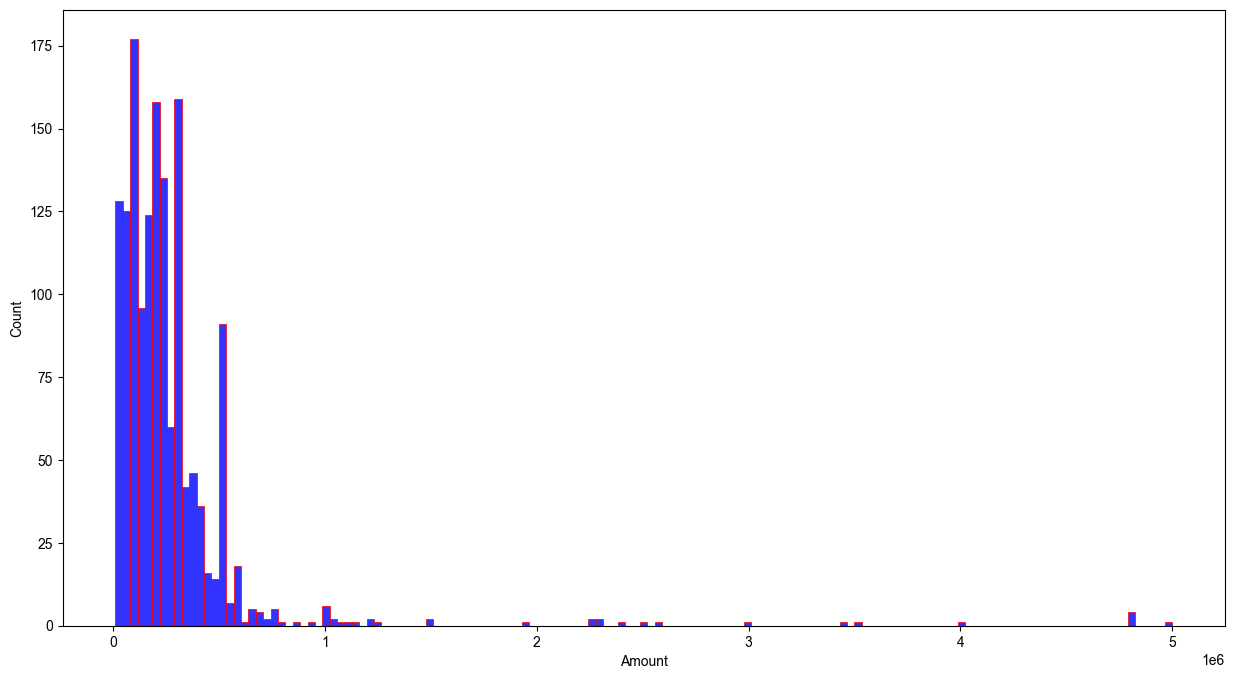

In [107]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_ehsan,
    x='Amount',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

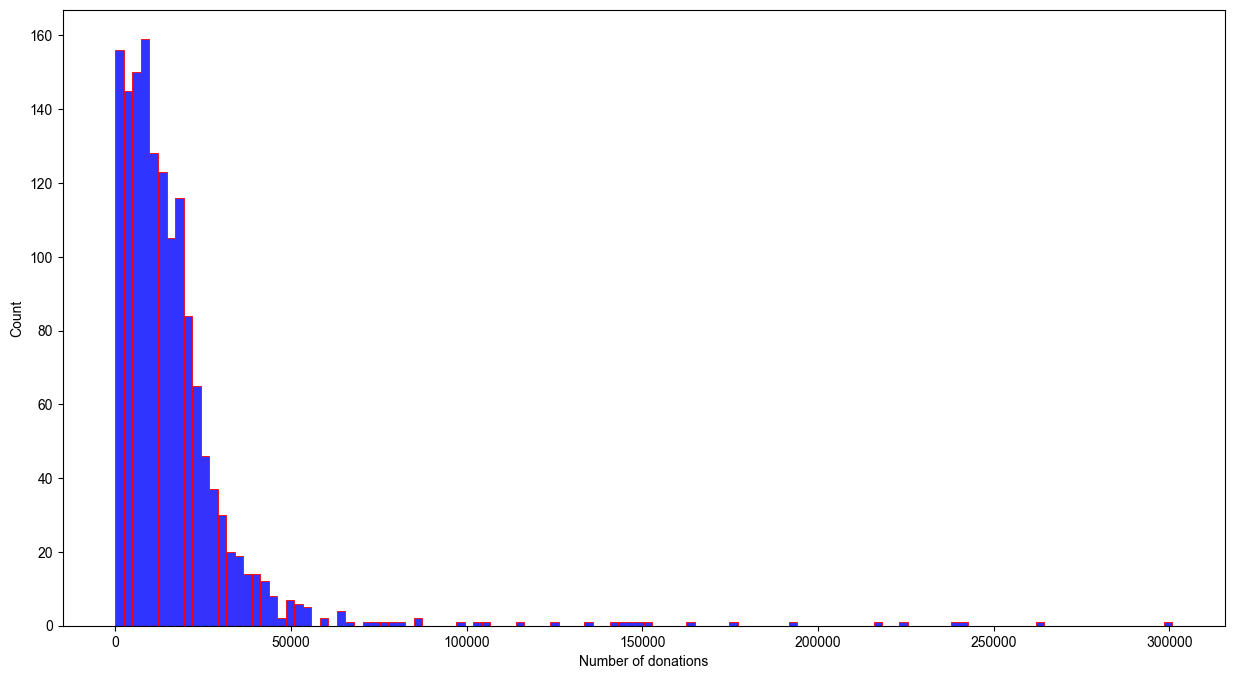

In [108]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_ehsan,
    x='Number of donations',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

### 2. Bivariate/Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

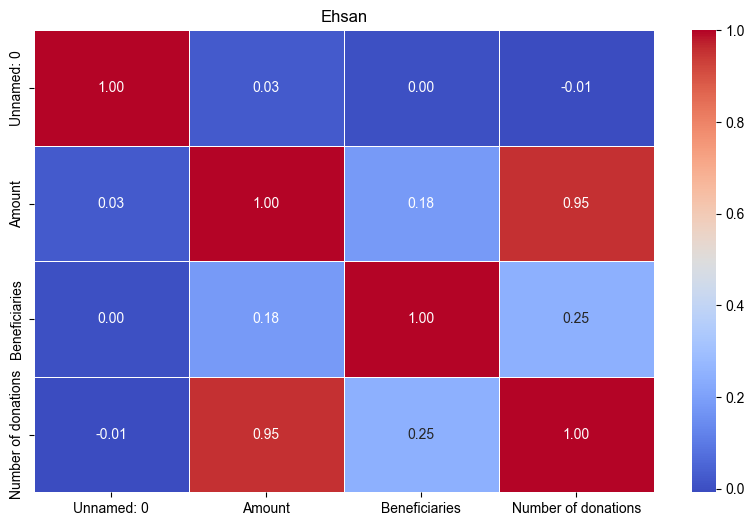

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_ehsan.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Ehsan")
plt.show()

In [110]:
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

In [111]:
plt.rcParams['font.family'] = 'Arial'


def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]


#district_counts = Riyadh_Aqqar[Riyadh_Aqqar['District'] != 'غير محدد'].groupby('District').size().sort_values(ascending=False).head(10)



## q1

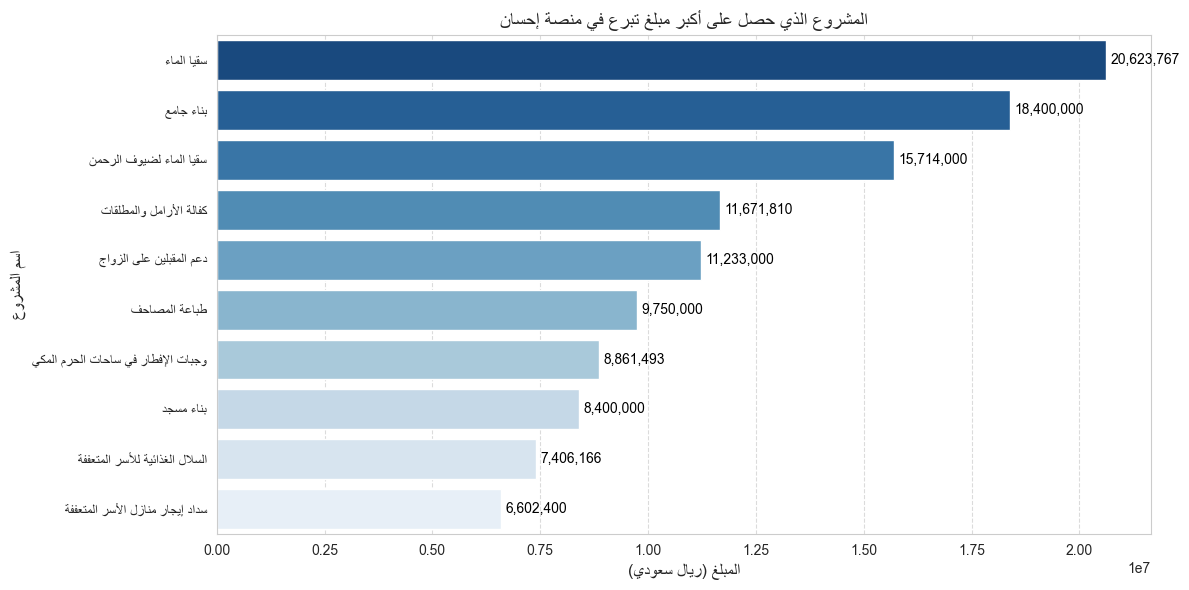

In [116]:

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]
aggregated_data = df_ehsan.groupby('Project Names', as_index=False)['Amount'].sum()


most_project = aggregated_data.sort_values('Amount', ascending=False).head(10)


fixed_labels = fix_arabic_labels(most_project['Project Names'])


plt.figure(figsize=(12, 6))


ax = sns.barplot(x=most_project['Amount'], y=fixed_labels, palette="Blues_r")


for i, value in enumerate(most_project['Amount']):
    ax.text(value + 100000, i, f'{value:,.0f}', va='center', fontsize=10, color='black')


plt.xlabel(get_display(arabic_reshaper.reshape("المبلغ (ريال سعودي)")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("اسم المشروع")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("المشروع الذي حصل على أكبر مبلغ تبرع في منصة إحسان")), fontsize=14)


plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## q2

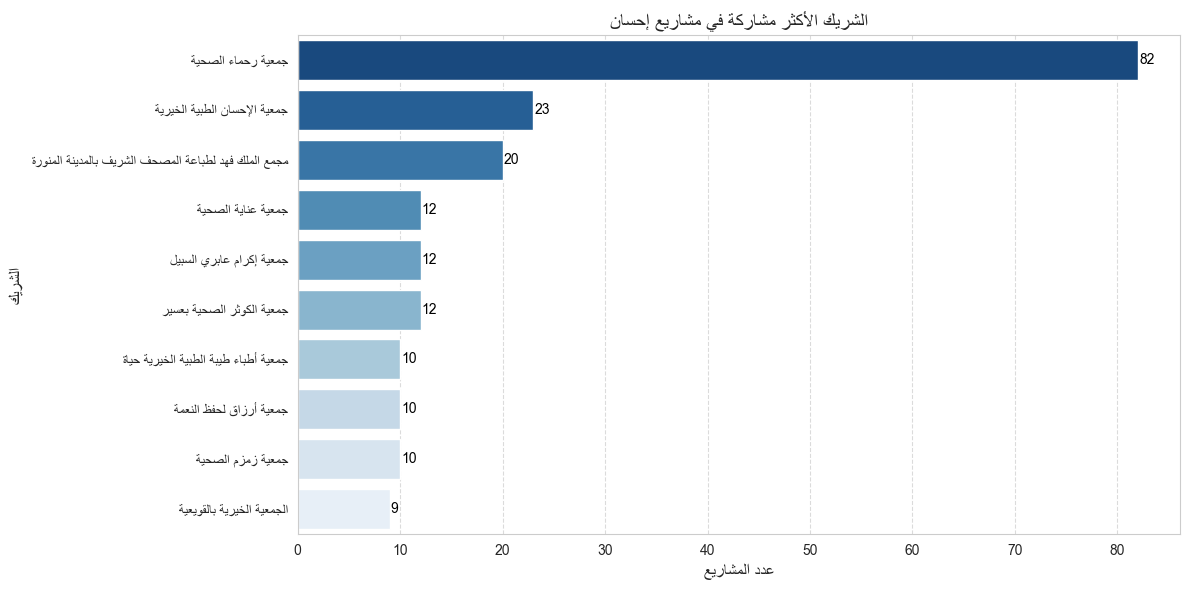

In [117]:
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]
partner_counts = df_ehsan.groupby('Partner').size().sort_values(ascending=False).head(10)

fixed_labels = fix_arabic_labels(partner_counts.index)

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=partner_counts.values, y=fixed_labels, palette="Blues_r")

for i, value in enumerate(partner_counts.values):
    ax.text(value + 0.1, i, f'{value}', va='center', fontsize=10, color='black')

plt.xlabel(get_display(arabic_reshaper.reshape("عدد المشاريع")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الشريك")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("الشريك الأكثر مشاركة في مشاريع إحسان")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## q3

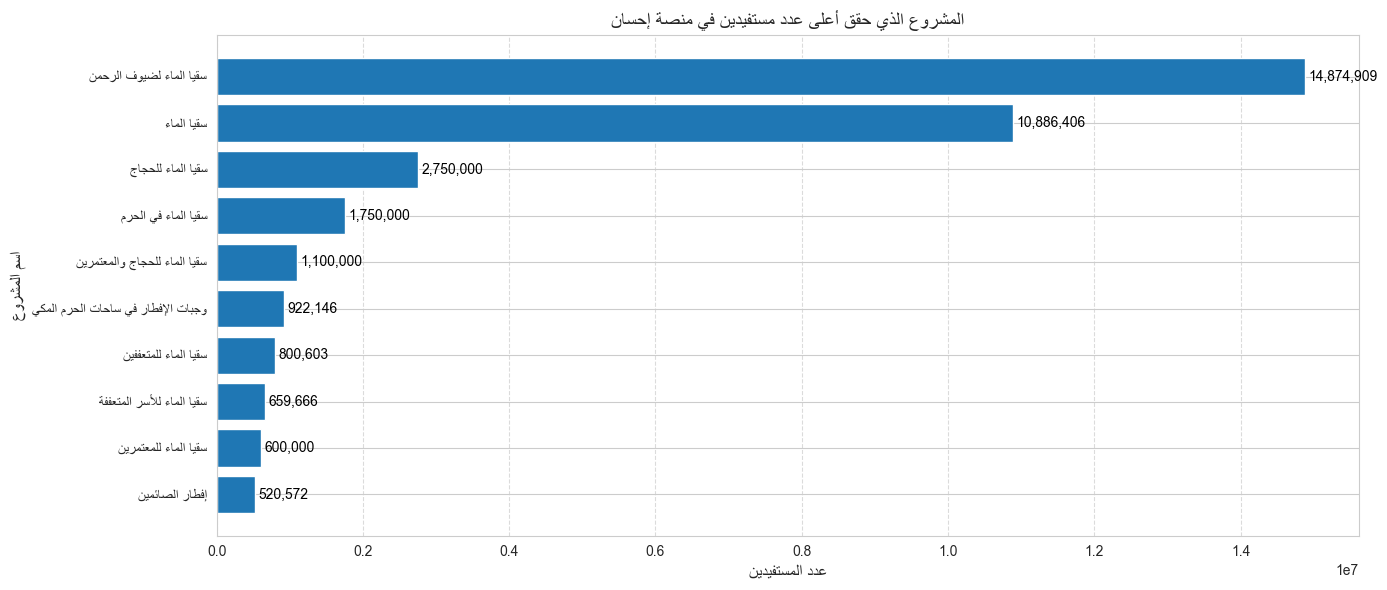

In [144]:
#Group by Project Names and sum the Beneficiaries
grouped_data = df_ehsan.groupby('Project Names', as_index=False)['Beneficiaries'].sum()

#Sort by Beneficiaries and get the top 10 projects
top_projects = grouped_data.sort_values('Beneficiaries', ascending=False).head(10)
top_projects = top_projects.sort_values('Beneficiaries')

#Fix Arabic labels
fixed_labels = fix_arabic_labels(top_projects['Project Names'])

#Create the plot
plt.figure(figsize=(14, 6))

#Plot horizontal bars
plt.barh(fixed_labels, top_projects['Beneficiaries'], color='#1f77b4')

#Add annotations (values) on the bars
for i, value in enumerate(top_projects['Beneficiaries']):
    plt.text(value + 50000, i, f'{value:,.0f}', va='center', fontsize=10, color='black')

#Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد المستفيدين")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("اسم المشروع")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("المشروع الذي حقق أعلى عدد مستفيدين في منصة إحسان")), fontsize=14)

#Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## q4

In [121]:
from hijri_converter import convert

In [ ]:

#Function to get Hijri month name
def get_hijri_month_name(date):
    hijri_date = convert.Gregorian(date.year, date.month, date.day).to_hijri()
    hijri_month = hijri_date.month
    hijri_month_names = {
        1: 'محرم',
        2: 'صفر',
        3: 'ربيع الأول',
        4: 'ربيع الثاني',
        5: 'جمادى الأولى',
        6: 'جمادى الثانية',
        7: 'رجب',
        8: 'شعبان',
        9: 'رمضان',
        10: 'شوال',
        11: 'ذو القعدة',
        12: 'ذو الحجة'
    }
    return hijri_month_names[hijri_month]

#Add a new column for Hijri month names
df_ehsan['Hijri_Month'] = df_ehsan['Date'].apply(get_hijri_month_name)




#Display the updated DataFrame
df_ehsan

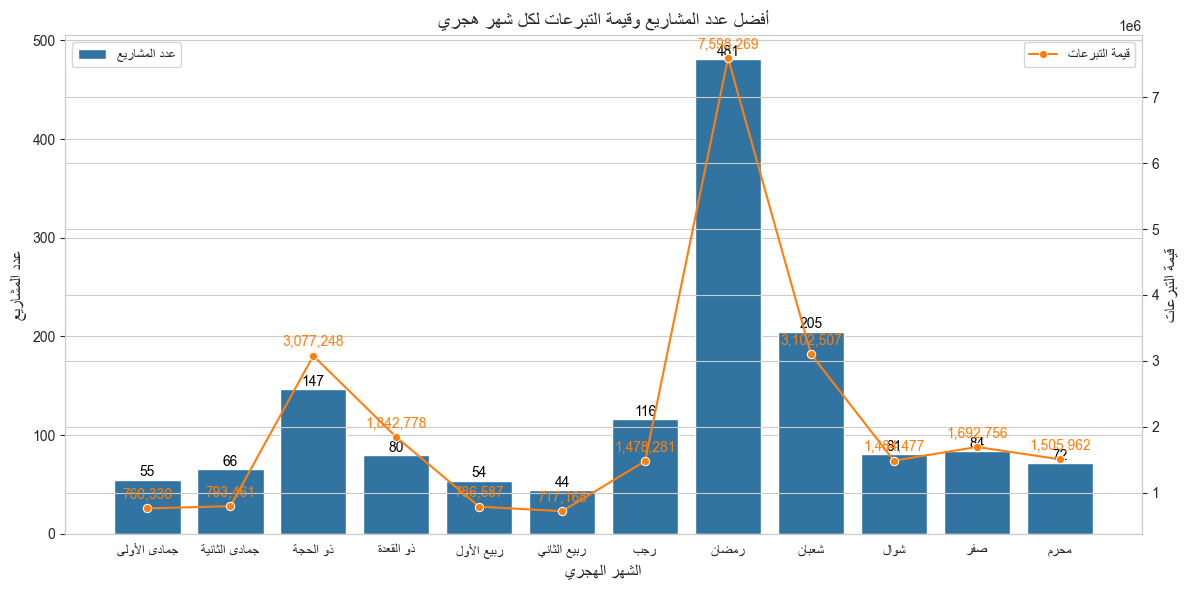

In [125]:
#Group by Hijri month and aggregate data
monthly_data = df_ehsan.groupby('Hijri_Month').agg({
    'Number of donations': 'sum',  # Sum of donations
    'Project Names': 'count'       # Count of projects
}).reset_index()

#Fix Arabic labels for display
monthly_data['Hijri_Month'] = fix_arabic_labels(monthly_data['Hijri_Month'])

#Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

#Plot the number of projects (bar chart)
ax1 = sns.barplot(
    x='Hijri_Month',
    y='Project Names',
    data=monthly_data,
    color='#1f77b4',
    label=(get_display(arabic_reshaper.reshape('عدد المشاريع')))
)

#Add annotations for the number of projects
for i, value in enumerate(monthly_data['Project Names']):
    ax1.text(i, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=10, color='black')

#Plot the donation values (line chart)
ax2 = plt.twinx()
sns.lineplot(
    x='Hijri_Month',
    y='Number of donations',
    data=monthly_data,
    color='#ff7f0e',
    marker='o',
    #label='قيمة التبرعات',
    label=(get_display(arabic_reshaper.reshape('قيمة التبرعات'))),
    ax=ax2
)

#Add annotations for the donation values
for i, value in enumerate(monthly_data['Number of donations']):
    ax2.text(i, value + 100000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10, color='#ff7f0e')

#Labels and title
ax1.set_xlabel(get_display(arabic_reshaper.reshape("الشهر الهجري")), fontsize=12)
ax1.set_ylabel(get_display(arabic_reshaper.reshape("عدد المشاريع")), fontsize=12)
ax2.set_ylabel(get_display(arabic_reshaper.reshape("قيمة التبرعات")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("أفضل عدد المشاريع وقيمة التبرعات لكل شهر هجري")), fontsize=14)

#Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Q5

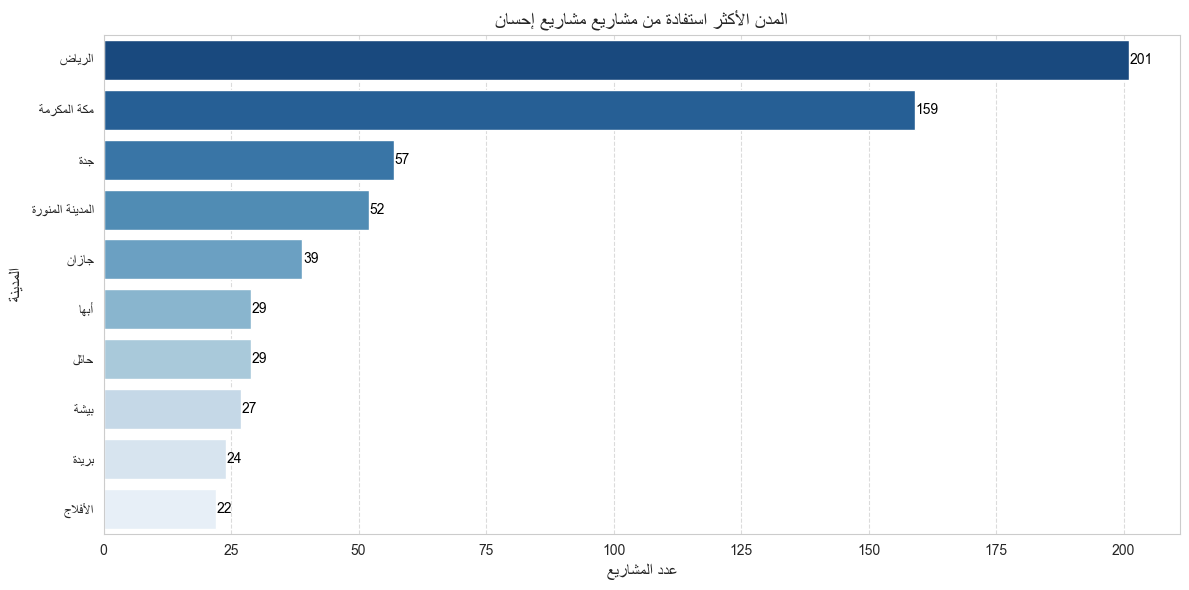

In [147]:
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]
partner_counts = df_ehsan.groupby('Location').size().sort_values(ascending=False).head(10)

fixed_labels = fix_arabic_labels(partner_counts.index)

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=partner_counts.values, y=fixed_labels, palette="Blues_r")

for i, value in enumerate(partner_counts.values):
    ax.text(value + 0.1, i, f'{value}', va='center', fontsize=10, color='black')

plt.xlabel(get_display(arabic_reshaper.reshape("عدد المشاريع")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("المدينة")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("المدن الأكثر استفادة من مشاريع مشاريع إحسان")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [152]:
rmadhan = df_ehsan[df_ehsan['Hijri_Month'] == 'رمضان']
rmadhan.groupby('Location').size().sort_values(ascending=False).head(10)

Location
الرياض             76
مكة المكرمة        67
جدة                22
المدينة المنورة    16
أبها               13
جازان              11
الأفلاج            10
نجران               7
حائل                7
محايل عسير          7
dtype: int64

## Save the data 

In [ ]:
#df_Football_Players.to_csv('data/clean_data.csv')